<a href="https://colab.research.google.com/github/Jace-Hambrick/projects/blob/master/Movie%20Project/Movie%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import ssl
from google.colab import files

In [2]:
#import the dataset from my computer

uploaded = files.upload()

Saving movies.csv to movies.csv


In [405]:
# I am a fricken genius. Needed RAW file in order to read properly.

import pandas as pd
url = 'https://raw.githubusercontent.com/Jace-Hambrick/projects/master/Movie%20Project/movies.csv'
movies = pd.read_csv(url)
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89.0,8.1,Wil Wheaton,299174.0,Stephen King,1986.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103.0,7.8,Matthew Broderick,264740.0,John Hughes,1986.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110.0,6.9,Tom Cruise,236909.0,Jim Cash,1986.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137.0,8.4,Sigourney Weaver,540152.0,James Cameron,1986.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90.0,6.9,Joey Cramer,36636.0,Mark H. Baker,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,1000000.0,Fewlas Entertainment,USA,Leigh Janiak,Horror,9168.0,Honeymoon,R,2014-09-12,87.0,5.7,Rose Leslie,20262.0,Phil Graziadei,2014.0
6227,60000000.0,Paramount Pictures,USA,Kenneth Branagh,Action,50577412.0,Jack Ryan: Shadow Recruit,PG-13,2014-01-17,105.0,6.2,Chris Pine,105471.0,Adam Cozad,2014.0
6228,15000000.0,Bob Industries,USA,Jean-Marc Vallée,Adventure,37880356.0,Wild,R,2014-12-19,115.0,7.1,Reese Witherspoon,98839.0,Nick Hornby,2014.0
6229,3000000.0,SModcast Pictures,USA,Kevin Smith,Comedy,1821983.0,Tusk,R,2014-09-19,102.0,5.4,Justin Long,35556.0,Kevin Smith,2014.0


In [0]:
# encoding = 'latin-1' required for the dataset to load properly

#movies = pd.read_csv('movies.csv' , encoding='latin-1')

In [406]:
movies

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89.0,8.1,Wil Wheaton,299174.0,Stephen King,1986.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103.0,7.8,Matthew Broderick,264740.0,John Hughes,1986.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110.0,6.9,Tom Cruise,236909.0,Jim Cash,1986.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137.0,8.4,Sigourney Weaver,540152.0,James Cameron,1986.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90.0,6.9,Joey Cramer,36636.0,Mark H. Baker,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,1000000.0,Fewlas Entertainment,USA,Leigh Janiak,Horror,9168.0,Honeymoon,R,2014-09-12,87.0,5.7,Rose Leslie,20262.0,Phil Graziadei,2014.0
6227,60000000.0,Paramount Pictures,USA,Kenneth Branagh,Action,50577412.0,Jack Ryan: Shadow Recruit,PG-13,2014-01-17,105.0,6.2,Chris Pine,105471.0,Adam Cozad,2014.0
6228,15000000.0,Bob Industries,USA,Jean-Marc Vallée,Adventure,37880356.0,Wild,R,2014-12-19,115.0,7.1,Reese Witherspoon,98839.0,Nick Hornby,2014.0
6229,3000000.0,SModcast Pictures,USA,Kevin Smith,Comedy,1821983.0,Tusk,R,2014-09-19,102.0,5.4,Justin Long,35556.0,Kevin Smith,2014.0


In [407]:
# Duplicate Companies, replace so that they have the same name.

movie_data = movies.replace('Columbia Pictures Corporation','Columbia Pictures')
movie_data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89.0,8.1,Wil Wheaton,299174.0,Stephen King,1986.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103.0,7.8,Matthew Broderick,264740.0,John Hughes,1986.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110.0,6.9,Tom Cruise,236909.0,Jim Cash,1986.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137.0,8.4,Sigourney Weaver,540152.0,James Cameron,1986.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90.0,6.9,Joey Cramer,36636.0,Mark H. Baker,1986.0


In [6]:
movie_data.sort_values(['released'],ascending=False).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6545,0.0,Bayerischer Rundfunk (BR),Germany,Julian Rosefeldt,Drama,143656.0,Manifesto,NOT RATED,2017-11-23,95,7.2,Cate Blanchett,1314,Julian Rosefeldt,2015
6651,30000000.0,Quad Productions,France,Eric Summer,Animation,12760985.0,Leap!,PG,2017-08-25,89,6.8,Elle Fanning,9517,Eric Summer,2016
6744,0.0,H Is 4 Productions,Ireland,Aisling Walsh,Biography,6139048.0,Maudie,PG-13,2017-08-04,115,7.7,Sally Hawkins,1735,Sherry White,2016
6668,5000000.0,Lifetime Films,Japan,Eleanor Coppola,Comedy,5300675.0,Paris Can Wait,PG,2017-08-03,92,5.8,Diane Lane,2629,Eleanor Coppola,2016
6819,0.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Dropping the columns that i dont need in order to find my answer

graph_data = movie_data.drop(columns=['budget','country','name','director','genre','gross','rating','released','runtime','star','votes','writer'])

In [9]:
graph_data

,company,score,year
0,Columbia Pictures,8.1,1986
1,Paramount Pictures,7.8,1986
2,Paramount Pictures,6.9,1986
3,Twentieth Century Fox Film Corporation,8.4,1986
4,Walt Disney Pictures,6.9,1986
...,...,...,...
6815,Fox Searchlight Pictures,5.4,2016
6816,Siempre Viva Productions,4.9,2016
6817,Warner Bros. Animation,6.5,2016
6818,Borderline Presents,6.2,2016


In [10]:
# Creating a dupe set to use so i dont affect the main dataset if something goes wrong

duped_graph = graph_data.copy()
duped_graph

,company,score,year
0,Columbia Pictures,8.1,1986
1,Paramount Pictures,7.8,1986
2,Paramount Pictures,6.9,1986
3,Twentieth Century Fox Film Corporation,8.4,1986
4,Walt Disney Pictures,6.9,1986
...,...,...,...
6815,Fox Searchlight Pictures,5.4,2016
6816,Siempre Viva Productions,4.9,2016
6817,Warner Bros. Animation,6.5,2016
6818,Borderline Presents,6.2,2016


In [11]:
duped_graph['company'].value_counts() <5

Universal Pictures                        False
Warner Bros.                              False
Columbia Pictures                         False
Paramount Pictures                        False
Twentieth Century Fox Film Corporation    False
                                          ...  
Moviola Film och Television AB             True
Blockbuster Films                          True
Four Seasons Partnership                   True
Silent Hill DCP Inc.                       True
Capella Films                              True
Name: company, Length: 2178, dtype: bool

In [12]:
# Looking at the top 10 companies.

duped_graph['company'].value_counts().head(10)

Universal Pictures                        302
Warner Bros.                              294
Columbia Pictures                         274
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
Touchstone Pictures                       131
Walt Disney Pictures                      102
Metro-Goldwyn-Mayer (MGM)                 101
TriStar Pictures                           85
Name: company, dtype: int64

In [0]:
# Creating a throwaway data set . . .

company_df = duped_graph[duped_graph['company']== 'Universal Pictures']

In [14]:
# . . . so that i can pull the unique years from it to use at a later time.

for i in company_df['year'].unique():
  print(i)


1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [57]:
# make a function that I can use to pull the average rating per company per year.

def co_up(company,year):
    global top10
    company_df =duped_graph[duped_graph['company'] == company]
    updated_co_df = company_df[company_df['year'] == year]
    mean_rate = updated_co_df['score'].mean()
    
    data = {'company': company,
            'average rating': mean_rate,
            'year': year}
    top10 = top10.append(data, ignore_index=True)


data = {'company': [],
        'average rating':[],
        'year': []}
top10 = pd.DataFrame(data=data)

top10

,company,average rating,year


In [19]:
duped_graph['company'].value_counts().head(10)

Universal Pictures                        302
Warner Bros.                              294
Columbia Pictures                         274
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
Touchstone Pictures                       131
Walt Disney Pictures                      102
Metro-Goldwyn-Mayer (MGM)                 101
TriStar Pictures                           85
Name: company, dtype: int64

In [58]:
# run the data through the function to get my new set limited to the top 10 companies

company_list = ['Universal Pictures', 'Warner Bros.','Paramount Pictures','Twentieth Century Fox Film Corporation','New Line Cinema','TriStar Pictures','Touchstone Pictures','Columbia Pictures','Walt Disney Pictures','Metro-Goldwyn-Mayer (MGM)']

for i in company_list:
  for j in range(1986, 2017):
    co_up(i, j)

top10

,company,average rating,year
0,Universal Pictures,5.680000,1986.0
1,Universal Pictures,6.080000,1987.0
2,Universal Pictures,6.857143,1988.0
3,Universal Pictures,6.766667,1989.0
4,Universal Pictures,6.090909,1990.0
...,...,...,...
305,Metro-Goldwyn-Mayer (MGM),NaN,2012.0
306,Metro-Goldwyn-Mayer (MGM),6.900000,2013.0
307,Metro-Goldwyn-Mayer (MGM),6.200000,2014.0
308,Metro-Goldwyn-Mayer (MGM),6.500000,2015.0


In [59]:
top10

,company,average rating,year
0,Universal Pictures,5.680000,1986.0
1,Universal Pictures,6.080000,1987.0
2,Universal Pictures,6.857143,1988.0
3,Universal Pictures,6.766667,1989.0
4,Universal Pictures,6.090909,1990.0
...,...,...,...
305,Metro-Goldwyn-Mayer (MGM),NaN,2012.0
306,Metro-Goldwyn-Mayer (MGM),6.900000,2013.0
307,Metro-Goldwyn-Mayer (MGM),6.200000,2014.0
308,Metro-Goldwyn-Mayer (MGM),6.500000,2015.0


In [21]:
# pivot table so that columns are companies and index is year, with the average ratings being the values.

actually_useable = top10.copy()
actually_useable =actually_useable.pivot(index='year', columns='company', values='average rating')
actually_useable

company,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Paramount Pictures,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,Walt Disney Pictures,Warner Bros.
year,,,,,,,,,,
1986.0,6.285714,5.733333,5.850000,6.423077,6.550000,6.150000,7.500000,5.680000,7.050000,5.633333
1987.0,5.812500,5.825000,5.600000,6.628571,6.400000,5.760000,6.233333,6.080000,NaN,6.357143
1988.0,5.962500,6.025000,6.425000,6.177778,6.350000,5.942857,6.850000,6.857143,NaN,5.681818
1989.0,6.000000,5.600000,4.700000,6.281818,6.500000,6.410000,6.733333,6.766667,7.600000,6.357143
1990.0,7.033333,6.300000,6.300000,6.425000,5.971429,5.775000,6.516667,6.090909,NaN,6.320000
1991.0,6.533333,6.650000,5.580000,6.275000,6.200000,6.116667,6.666667,5.970000,7.075000,6.587500
1992.0,6.500000,6.925000,6.400000,5.988889,6.175000,7.200000,6.325000,6.625000,7.850000,6.500000
1993.0,6.710000,6.266667,5.288889,6.150000,6.200000,6.666667,6.190000,7.011111,6.525000,6.710000
1994.0,5.871429,5.550000,6.555556,6.170000,5.814286,6.183333,6.200000,5.933333,6.350000,5.872727


In [0]:
# X axis is Years
# Y axis is scores
# Line's would be each individual company
# generate the average for each company

In [23]:
graph_data['company'].value_counts()

Universal Pictures                        302
Warner Bros.                              294
Columbia Pictures                         274
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
                                         ... 
Moviola Film och Television AB              1
Blockbuster Films                           1
Four Seasons Partnership                    1
Silent Hill DCP Inc.                        1
Capella Films                               1
Name: company, Length: 2178, dtype: int64

In [0]:
data = {'company name':[],'average score for year': [],'year' :[]}
duped_data = pd.DataFrame(data)

In [116]:
import plotly.express as px

df = top10
fig1 = px.line(df, x="year", y="average rating", color="company",
              line_group="company", hover_name="company")
fig1.update_layout(legend_orientation="h")
fig1.update_layout(margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4))
fig1.update_layout(
     legend=dict(
         x=0.05,
         y=1.25,
         traceorder="normal",
         font=dict(
             family="sans-serif",
             size=12,
             color="black"
         ),
         bgcolor="LightSteelBlue",
         bordercolor="Black",
         borderwidth=2))
fig1.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig1.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig1.show()

In [0]:
fig1.write_html("plotfig.html")

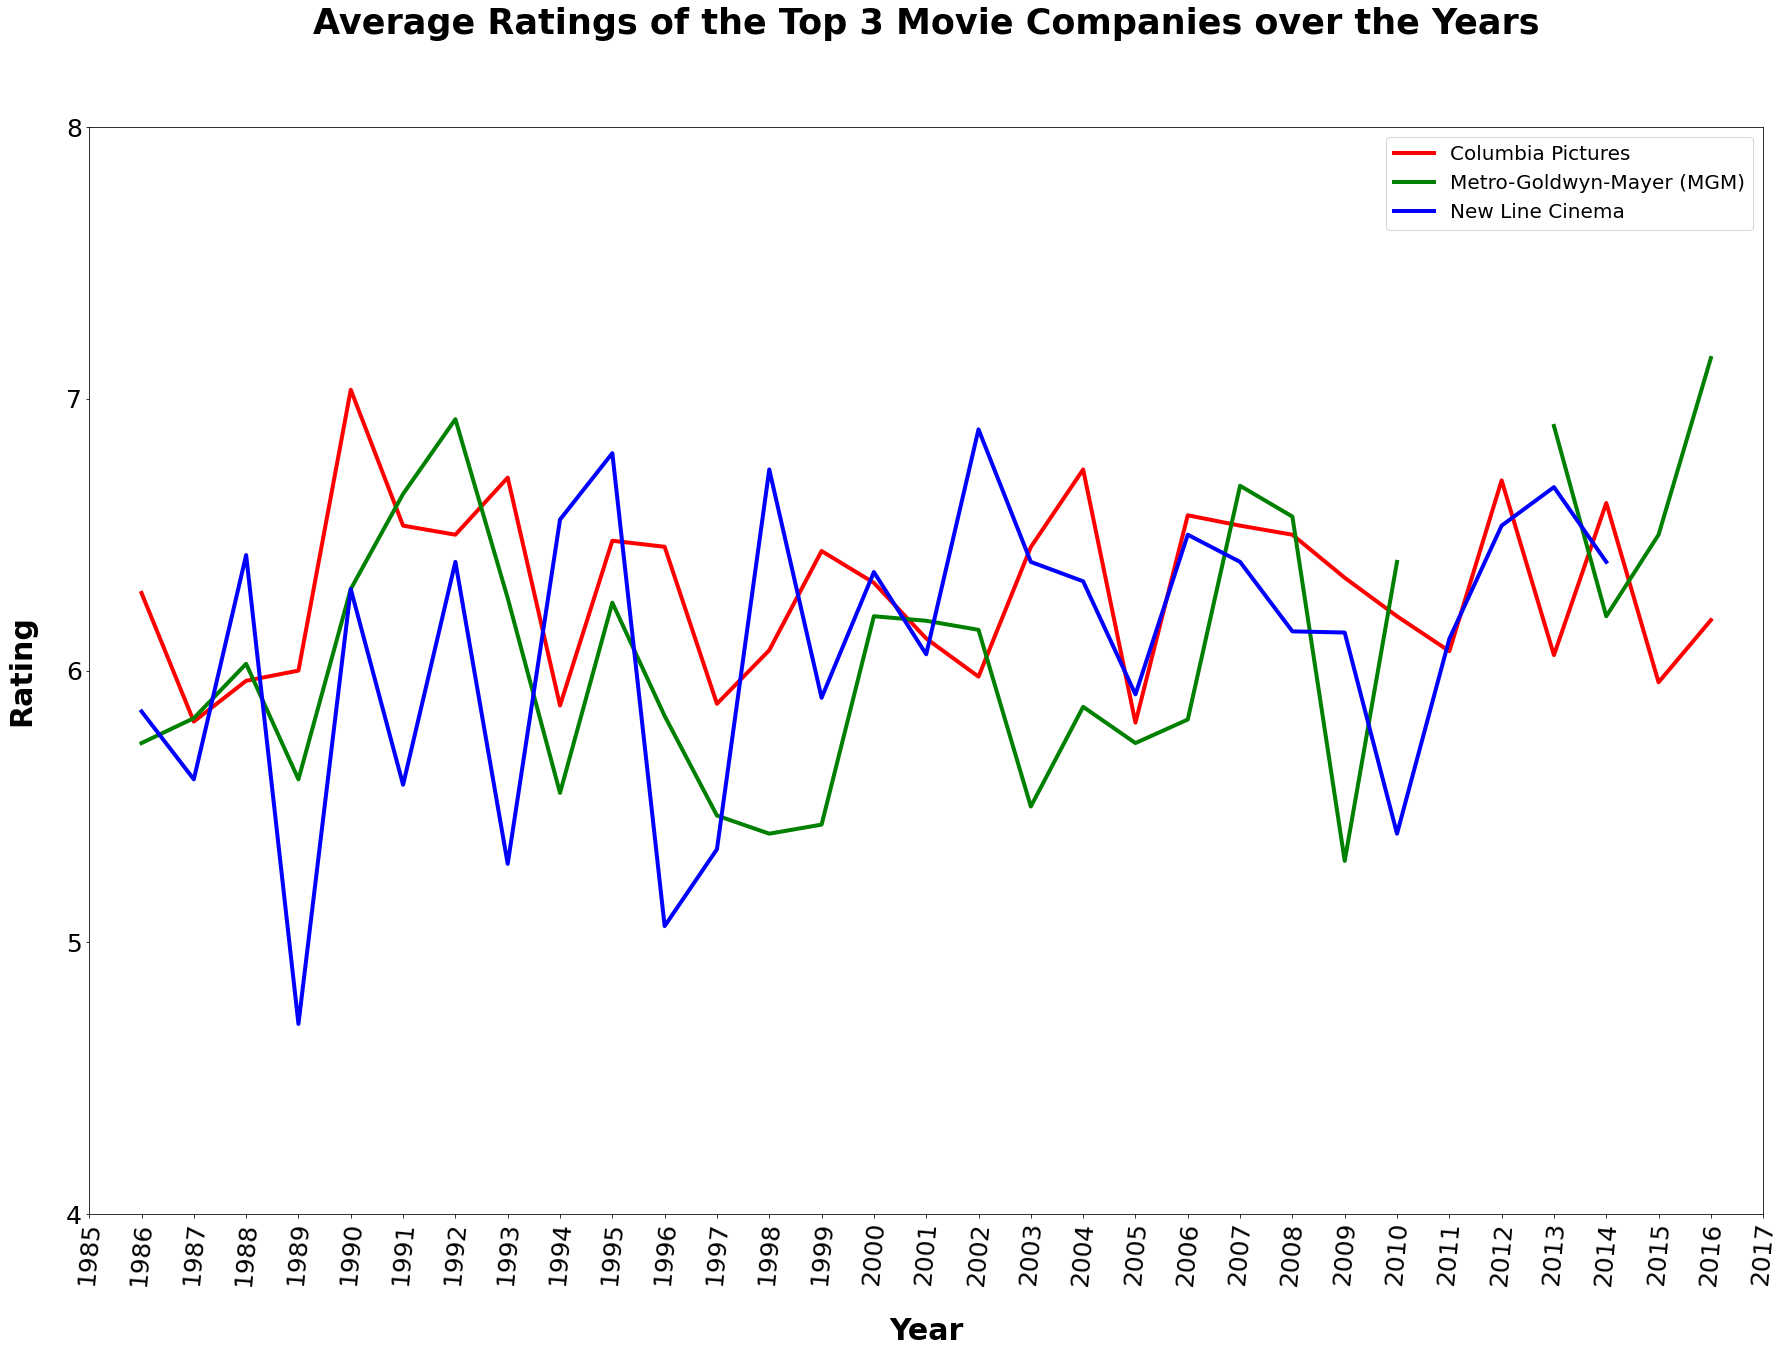

In [40]:
# plot a line graph of the top 10.
# however it's a bit cluttered, so reduced to 3.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

fig = plt.figure(figsize=(30,20))
ae = fig.add_subplot( )

fig.set_facecolor('white')
ae.set_facecolor('white')

ae.plot(actually_useable['Columbia Pictures'], color='red', linewidth=4)
ae.plot(actually_useable['Metro-Goldwyn-Mayer (MGM)'], color='green', linewidth=4)
ae.plot(actually_useable['New Line Cinema'], color='blue', linewidth=4)
#ae.plot(actually_useable['Paramount Pictures'], color='yellow', linewidth=4)
#ae.plot(actually_useable['Touchstone Pictures'], color='magenta', linewidth=4)
#ae.plot(actually_useable['TriStar Pictures'], color='purple', linewidth=4)
#ae.plot(actually_useable['Twentieth Century Fox Film Corporation'], color='cyan', linewidth=4)
#ae.plot(actually_useable['Universal Pictures'], color='dimgrey', linewidth=4)
#ae.plot(actually_useable['Walt Disney Pictures'], color='turquoise', linewidth=4)
#ae.plot(actually_useable['Warner Bros.'], color='lime', linewidth=4)

ae.set_xlim(1985,2017)
ae.set_ylim(4,8)

ae.tick_params(axis='both', which='major', labelsize=25)
ae.tick_params(axis='x', which='major', rotation=85)
#ae.set_xticklabels(fontsize=13)
#ae.set_yticklabels(fontsize=13)

ae.set_title("Average Ratings of the Top 3 Movie Companies over the Years", fontsize=35, fontweight='bold', y=1.08)
ae.set_xlabel("Year", fontsize=30, fontweight='bold', labelpad=30)
ae.set_ylabel("Rating", fontsize=30, fontweight='bold', labelpad=30)

ae.xaxis.set_major_locator(MultipleLocator(1))
ae.xaxis.set_minor_locator(AutoMinorLocator(1))
ae.yaxis.set_major_locator(MultipleLocator(1))
ae.yaxis.set_minor_locator(AutoMinorLocator(1))

ae.legend(['Columbia Pictures','Metro-Goldwyn-Mayer (MGM)','New Line Cinema'], fontsize=20)


#fig.set_tight_layout()

plt.show()

In [26]:
test_df = pd.crosstab(graph_data['company'],graph_data['score'])
test_df

### Figure out how to make a graph that is Company's average Movie rating per year. Or possibly Company's average movie rating. Try for the first.

score,1.5,1.6,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.3
company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""DIA"" Productions GmbH & Co. KG",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1+2 Seisaku Iinkai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
101st Street Films,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10th Hole Productions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120 Films,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zucker Brothers Productions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
double A Films,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
erbp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [287]:
graph_data['company'].index

RangeIndex(start=0, stop=6820, step=1)

In [0]:
#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
#
#fig = plt.figure(figsize=(10,10))
#ar = fig.add_subplot()
#
#fig.set_facecolor('white')
#ar.set_facecolor('white')
#
#ar.barh(score_year['year'], score_year['score'],align='center')
#
#ar.set_yticks(score_year['year'])
#ar.set_xticks(score_year['score'])
#
#ar.set_yticklabels(score_year['year'], fontsize=13)
#ar.set_xticklabels([6,6,6.1,6.2,6.3,6.4,6.5,6.6], fontsize=13)
#
#ar.set_xlim(6,6.6)
#ar.set_ylim(1985.1,2016.9)
#
#ar.set_title("Average Movie Rating per Year", fontsize=25, verticalalignment='bottom')
#ar.set_xlabel("Rating",fontsize=20)
#ar.set_ylabel("Year",fontsize=20)
#
#ar.grid(linestyle="-", linewidth=0.5, zorder=-10, axis='x')
#
#ar.xaxis.set_major_locator(MultipleLocator(.1))
#ar.xaxis.set_minor_locator(AutoMinorLocator(.1))
#ar.yaxis.set_major_locator(MultipleLocator(1))
#ar.yaxis.set_minor_locator(AutoMinorLocator(1))

In [28]:
# Moving to our next visual. Pulling from Graph_Data now.

test_scores = pd.crosstab(graph_data['year'],graph_data['score'])
test_scores

score,1.5,1.6,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.3
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1986,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,1,2,3,3,3,1,2,4,2,3,4,9,7,8,10,13,7,17,5,7,7,5,5,4,11,5,4,8,8,5,9,8,4,2,2,0,8,0,2,4,0,0,1,0,0,0,0,0,0,0
1987,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,2,1,1,0,0,3,0,3,1,1,1,4,3,5,4,2,4,3,6,6,6,5,7,8,9,6,10,6,6,9,10,8,8,6,4,6,5,6,6,5,7,5,2,7,4,1,2,0,1,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,2,2,2,1,2,2,5,5,2,5,6,4,6,5,13,10,14,12,8,8,11,5,3,6,7,8,7,8,6,2,11,5,3,8,5,1,0,2,1,1,1,0,1,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,2,3,4,3,4,2,3,6,4,3,4,6,4,4,5,8,7,7,7,17,10,13,12,8,3,3,9,8,8,3,9,2,5,5,7,2,1,3,2,0,0,1,0,0,0,0,0,0,0,0
1990,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,2,4,1,0,3,3,2,3,3,3,6,8,5,6,8,9,9,7,10,9,9,10,8,7,9,7,6,6,5,5,7,5,8,10,1,6,1,1,0,0,1,0,0,0,1,0,0,0,0
1991,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,2,0,1,0,2,1,2,2,3,4,3,3,5,2,5,2,14,8,10,8,11,5,6,8,14,3,15,10,7,6,10,10,7,6,2,4,6,3,1,2,0,1,0,0,1,1,0,0,0,0,0
1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,1,0,1,1,2,3,3,2,5,4,6,6,9,7,11,6,10,5,5,10,12,12,5,8,5,13,8,7,14,3,0,8,11,5,2,2,2,0,1,1,0,0,0,0,0,0,0,0
1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,1,2,2,1,2,1,3,4,4,3,2,2,4,10,4,7,8,9,3,8,9,7,7,9,8,8,13,7,3,8,8,4,6,7,5,6,5,4,5,3,0,0,0,0,0,0,0,1,0,0
1994,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,2,0,2,4,0,3,2,3,0,4,5,4,6,8,7,4,7,4,9,8,9,8,6,10,10,9,8,2,7,4,5,8,9,3,11,5,2,4,2,1,3,0,1,0,1,1,0,1,1,0,1


In [29]:
# Somewhat manual function to pull the Average Score of every movie per a Certain Year.

def update(year):
    global score_year
    
    new_df = graph_data[graph_data['year'] == year]
    mean_score = new_df['score'].mean()
    
    data = {'score': mean_score,
            'year': year }
    score_year = score_year.append(data, ignore_index=True)


data = {'score': [],
        'year': []}
score_year = pd.DataFrame(data=data)


update(1986)
update(1987)
update(1988)
update(1989)
update(1990)
update(1991)
update(1992)
update(1993)
update(1994)
update(1995)
update(1996)
update(1997)
update(1998)
update(1999)
update(2000)
update(2001)
update(2002)
update(2003)
update(2004)
update(2005)
update(2006)
update(2007)
update(2008)
update(2009)
update(2010)
update(2011)
update(2012)
update(2013)
update(2014)
update(2015)
update(2016)
score_year.head(31)

,score,year
0,6.119545,1986.0
1,6.142922,1987.0
2,6.223182,1988.0
3,6.133484,1989.0
4,6.236818,1990.0
5,6.334545,1991.0
6,6.387273,1992.0
7,6.353636,1993.0
8,6.273636,1994.0
9,6.376818,1995.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
score,6.119545,6.142922,6.223182,6.133484,6.236818,6.334545,6.387273,6.353636,6.273636,6.376818,6.203182,6.309545,6.396364,6.392273,6.346818,6.444545,6.369545,6.376818,6.496364,6.394091,6.478636,6.474545,6.364091,6.438636,6.468182,6.456818,6.439545,6.58,6.560455,6.499545,6.55
year,1986.000000,1987.000000,1988.000000,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.00,2014.000000,2015.000000,2016.00


In [0]:
# Turning the year column into an integer

score_year['year'] = score_year['year'].astype(int)

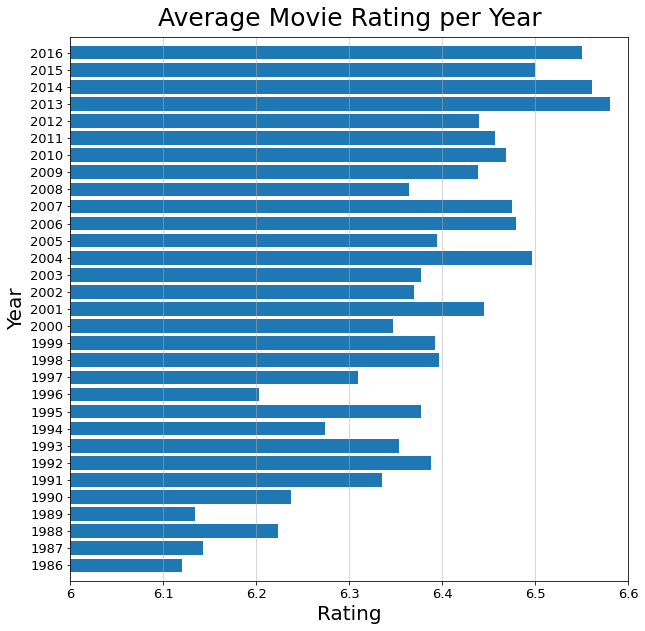

In [282]:
# Graphing a horizontal bar graph.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

fig = plt.figure(figsize=(10,10))
ar = fig.add_subplot()

fig.set_facecolor('white')
ar.set_facecolor('white')

ar.barh(score_year['year'], score_year['score'],align='center')

ar.set_yticks(score_year['year'])
ar.set_xticks(score_year['score'])

ar.set_yticklabels((0,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016), fontsize=13)
ar.set_xticklabels([6,6,6.1,6.2,6.3,6.4,6.5,6.6], fontsize=13)

ar.set_xlim(6,6.6)
ar.set_ylim(1985.1,2016.9)

ar.set_title("Average Movie Rating per Year", fontsize=25, verticalalignment='bottom')
ar.set_xlabel("Rating",fontsize=20)
ar.set_ylabel("Year",fontsize=20)

ar.grid(linestyle="-", linewidth=0.5, zorder=-10, axis='x')

ar.xaxis.set_major_locator(MultipleLocator(.1))
ar.xaxis.set_minor_locator(AutoMinorLocator(.1))
ar.yaxis.set_major_locator(MultipleLocator(1))
ar.yaxis.set_minor_locator(AutoMinorLocator(1))


plt.show()

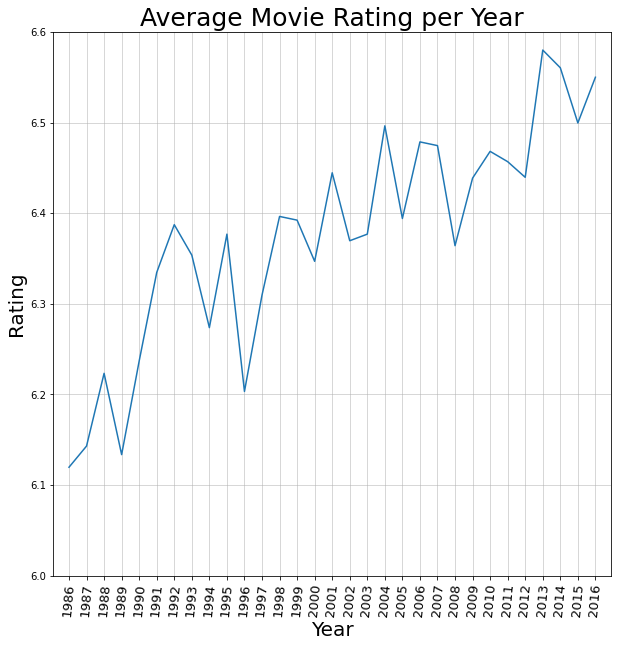

In [259]:
# Graphing a line chart

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

fig.set_facecolor('white')
ax.set_facecolor('white')

ax.plot(score_year['year'], score_year['score'])

ax.set_yticks(score_year['score'])
ax.set_xticks(score_year['year'])


ax.set_xticklabels((0,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016), rotation= 85, fontsize= 13)

ax.set_xlim(1985.1,2016.9)
ax.set_ylim(6,6.6)

ax.set_title("Average Movie Rating per Year", fontsize=25)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Rating",fontsize=20)

ax.grid(linestyle="-", linewidth=0.5, zorder=-10, axis='both')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(.5))


plt.show()


In [0]:
with_names = movie_data.drop(columns=['budget','country','director','genre','gross','rating','released','runtime','star','votes','writer']) 

In [332]:
# New table that holds movies with a score equal to or greater than 8

high_score = with_names[with_names['score'] >=8]

high_score

,company,name,score,year
0,Columbia Pictures,Stand by Me,8.1,1986
3,Twentieth Century Fox Film Corporation,Aliens,8.4,1986
5,Hemdale,Platoon,8.1,1986
52,Orion Pictures,Hannah and Her Sisters,8.0,1986
61,Svenska Filminstitutet (SFI),Sacrifice,8.1,1986
...,...,...,...,...
6623,The Weinstein Company,Lion,8.1,2016
6630,Walt Disney Pictures,Zootopia,8.0,2016
6648,Moho Film,The Handmaiden,8.1,2016
6713,Aamir Khan Productions,Dangal,8.7,2016


In [337]:
high_score['company'].nunique()

155

In [358]:
import plotly.express as px
highers = high_score 
fig2 = px.scatter(highers, x="year", y="score", color="company", hover_data=['name'])
fig2.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig2.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig2.update_xaxes(tick0=1986, dtick=1)
#fig2.update_layout(
#    legend=dict(x=0.05,y=1.25,traceorder="normal",
#        font=dict(family="sans-serif",size=12,color="black"),
#        bgcolor="LightSteelBlue",bordercolor="Black",borderwidth=2))
#fig2.update_layout(legend_orientation="h")
fig2.update_layout(showlegend=False)

fig2.update_layout(
    title="Movies Rated an 8 or Higher",xaxis_title="Year",yaxis_title="Rating",
    font=dict(family="sans-serif",size=20,color="black"))
fig2.update_layout(
    title={'text': "Movies Rated an 8 or Higher",
           'y':.95,'x':0.5,
           'xanchor': 'center','yanchor': 'top'})
fig2.show()

In [0]:
fig2.write_html("plotfig2.html")